Elapsed time: 0.0024824142456054688
Elapsed time: 0.03324699401855469
Elapsed time: 0.0009891986846923828


/home/kirill/digitalOS/env/lib/python3.10/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/kirill/digitalOS/env/lib/python3.10/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


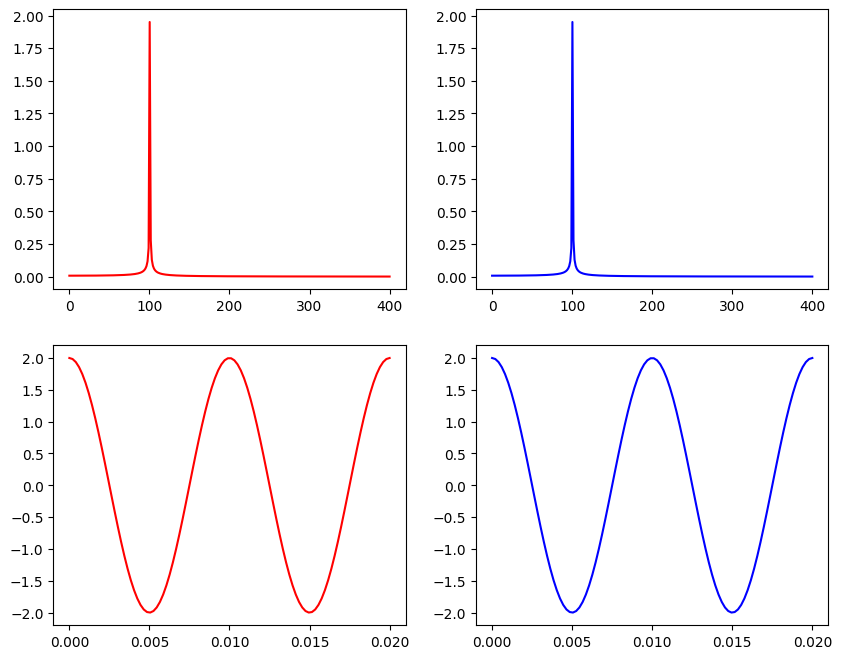

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from dec_timer import timeit

@timeit
def DFT_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

@timeit
def dec(func, x):
    return func(x)

def my_cos(x, f=100, A=2.0):
    return A * np.cos(x * f * 2.0 * np.pi)

def draw_spectr(func, fft, f=100, fmax=800, N=600, eps=0, color='blue'):
    T = 1 / fmax
    x = np.linspace(0.0, N * T, N)
    y = func(x, f)
    if eps > 0:
        noise = np.random.normal(loc=0.0, scale=eps, size=N)
        y = y + noise
    yf = fft(y)

    xf = np.linspace(0.0, fmax / 2, N // 2)
    
    amplitude = 2.0 / N * np.abs(yf[0:N // 2])

    plt.plot(xf, amplitude, color=color)

f = 100
x = np.linspace(0, 0.02, 100)
y = my_cos(x, f, 2)

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
y_dft = DFT_slow(y)
draw_spectr(my_cos, DFT_slow, 0.5, color='red')

plt.subplot(2, 2, 2)
y_fft = dec(np.fft.fft, y)
draw_spectr(my_cos, np.fft.fft, 0.5, color='blue')

plt.subplot(2, 2, 3)
plt.plot(x, np.fft.ifft(y_dft), 0.5, color='red')

plt.subplot(2, 2, 4)
plt.plot(x, np.fft.ifft(y_dft), 0.5,color='blue')
plt.show()




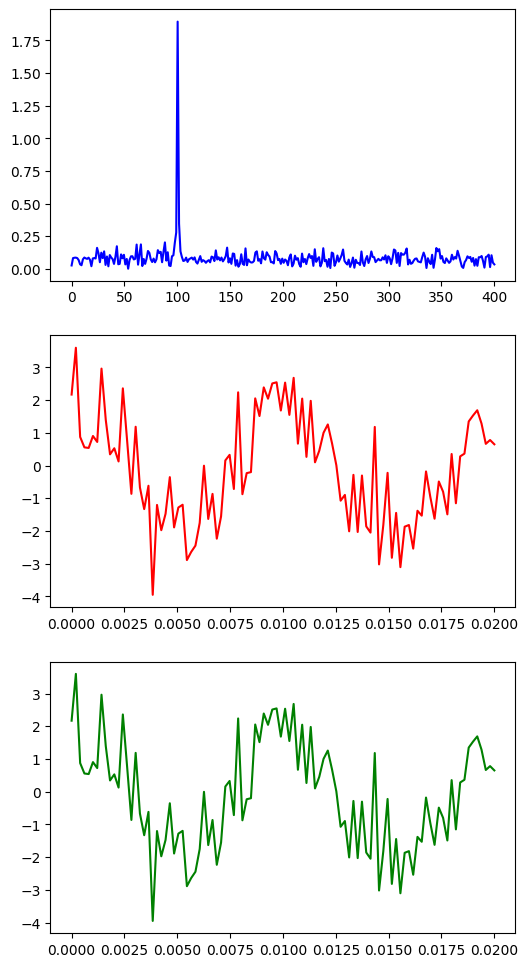

In [10]:
plt.figure(figsize=(6, 12))

f = 100
x = np.linspace(0, 0.02, 100)
y = my_cos(x, f, 2)
y += np.random.normal(0, 1, y.shape)

plt.subplot(3, 1, 2)
plt.plot(x, y, color='red')

plt.subplot(3, 1, 1)
draw_spectr(my_cos, np.fft.fft, eps=1)

plt.subplot(3, 1, 3)
plt.plot(x, np.fft.ifft(np.fft.fft(y)), color='green')
plt.show()

Elapsed time: 0.02593994140625
Elapsed time: 0.031081438064575195


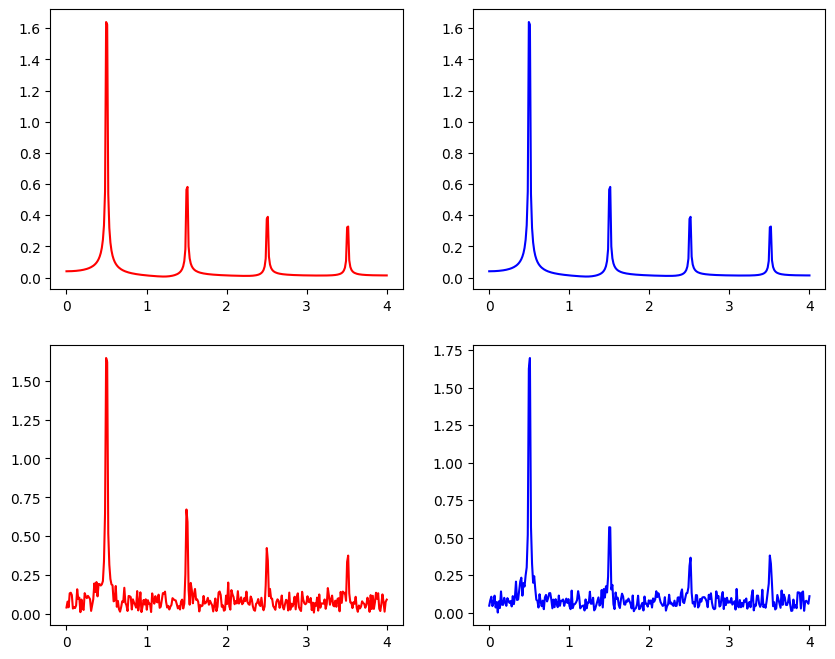

In [20]:
def quadratic_signal(t, A=2, T=2):
    return A - 2 * A * ((t % T) // (T / 2))


x = np.linspace(-4, 4, 1000)
y = quadratic_signal(x)

N = 600
fmax = 8
A = 2
T = 1.0 / fmax
f = 2
eps = 1

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
draw_spectr(quadratic_signal, np.fft.fft, f, fmax, N, color='red')

plt.subplot(2, 2, 2)
draw_spectr(quadratic_signal, DFT_slow, f, fmax, N)

plt.subplot(2, 2, 3)
draw_spectr(quadratic_signal, np.fft.fft, f, fmax, N, eps, color='red')

plt.subplot(2, 2, 4)
draw_spectr(quadratic_signal, DFT_slow, f, fmax, N, eps)